In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

# Fetch Data

In [3]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

#dim ethen
dim = 48

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethen_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethen_6-31g**.npy"), dim), 
)

[-] 2018-04-26 14:03:02: Data set normalized. Mean value std: 0.015509696395796234


# Ethan
dim = 48

dim^2 = 2304

dim_ut = 1176

In [4]:
dim_triu = int(dim * (dim + 1) / 2)

In [ ]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_triu, dim_triu, dim_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset,
    convergence_threshold=5e-1
)
graph = trainer.graph

[ ] 2018-04-26 14:07:46: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7f8adc0f2390>
[-] 2018-04-26 14:07:46: Setting up the training in the target graph ...
[-] 2018-04-26 14:07:46: network ...
[-] 2018-04-26 14:07:46: error function ...
[-] 2018-04-26 14:07:46: cost function ...
[-] 2018-04-26 14:07:46: training step
[-] 2018-04-26 14:07:46: Starting network training ...
[ ] 2018-04-26 14:07:46: Val. Cost: 1.601E-02. Error: 1.600E-02. Diff: 1.0E+10


In [6]:
p = network.run(sess, dataset.testing[0])

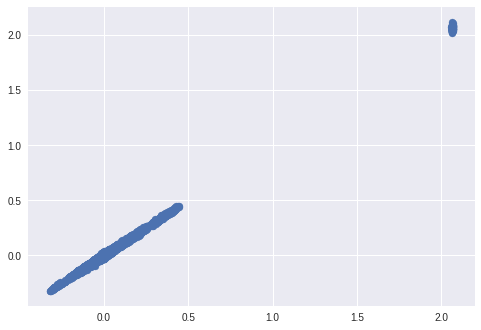

In [7]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [8]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-26 14:03:17: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:18: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:18: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:19: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:20: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:20: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:20: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:21: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:21: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:22: Iteration calculation: 9
[ ] 2018-04-26 14:03:22: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:23: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:23: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:23: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:24: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:24: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:25: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:26: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:26: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:27: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:27: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:28: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:28: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:29: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:29: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:30: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:30: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:30: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:31: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:31: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:32: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:32: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:33: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:33: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:34: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:35: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:35: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:36: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:36: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:36: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:37: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:38: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:38: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:39: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:39: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:40: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:40: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:41: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:41: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:42: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [9]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
7.84223E-01 +- 1.87241E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
9.61022E-03 +- 1.94327E-03
--- Occupance Error ---
1.60075E+01 +- 1.12013E-01
--- Avg. Iterations ---
1.56000E+01 +- 4.46766E+00



## McWheeny that shit

In [10]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [11]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [12]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [13]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-26 14:03:53: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:54: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:54: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:54: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:55: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:55: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:56: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:56: Iteration calculation: 7
[ ] 2018-04-26 14:03:57: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:57: Iteration calculation: 9
[ ] 2018-04-26 14:03:57: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:58: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:58: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:59: Iteration calculation: 13
[ ] 2018-04-26 14:03:59: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:03:59: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:00: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:00: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:01: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:01: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:02: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:02: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:03: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:03: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:04: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:04: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:05: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:05: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:05: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:06: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:06: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:07: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:07: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:08: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:08: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:09: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:09: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:10: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:11: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:11: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:12: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:12: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:13: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:13: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:14: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:14: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:15: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:16: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:16: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:17: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [14]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
7.84023E-01 +- 1.87219E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
6.71730E-04 +- 2.82548E-04
--- Occupance Error ---
1.60232E+01 +- 1.37419E-02
--- Avg. Iterations ---
1.28200E+01 +- 3.07695E+00



In [15]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-26 14:04:30: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:30: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:31: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:31: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:32: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:32: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:32: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:33: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:33: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:34: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:35: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:35: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:36: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:36: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:37: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:37: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:38: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:38: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:39: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:40: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:41: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:41: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:41: Iteration calculation: 22
[ ] 2018-04-26 14:04:42: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:42: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:42: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:43: Iteration calculation: 26
[ ] 2018-04-26 14:04:43: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:44: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:44: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:45: Iteration calculation: 30
[ ] 2018-04-26 14:04:45: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:45: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:46: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:46: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:47: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:47: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:48: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:48: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:49: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:49: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:50: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:50: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:51: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:51: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:52: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:52: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:53: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:53: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:04:54: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [16]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
7.83954E-01 +- 1.87203E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
3.12336E-17 +- 6.30689E-18
--- Occupance Error ---
1.60000E+01 +- 2.28868E-15
--- Avg. Iterations ---
1.28000E+01 +- 3.28634E+00



## Classical Ethan

In [19]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [20]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-26 14:06:00: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:00: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:01: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:01: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:02: Iteration calculation: 4


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:02: Iteration calculation: 5
[ ] 2018-04-26 14:06:03: Iteration calculation: 6
[ ] 2018-04-26 14:06:03: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:03: Iteration calculation: 8
[ ] 2018-04-26 14:06:04: Iteration calculation: 9


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:04: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:04: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:05: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:05: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:06: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:06: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:06: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:07: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:07: Iteration calculation: 18
[ ] 2018-04-26 14:06:08: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:08: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:09: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:09: Iteration calculation: 22
[ ] 2018-04-26 14:06:09: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:10: Iteration calculation: 24
[ ] 2018-04-26 14:06:10: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:11: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:11: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:11: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:12: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:12: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:13: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:13: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:14: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:14: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:14: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:15: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:15: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:15: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:16: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:17: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:17: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:17: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:18: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:18: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:19: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:19: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:20: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:20: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:21: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [22]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
7.85271E-01 +- 1.87607E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.06776E-02 +- 7.91924E-04
--- Occupance Error ---
1.60000E+01 +- 3.03544E-15
--- Avg. Iterations ---
1.22200E+01 +- 1.92135E+00



In [23]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-26 14:06:32: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:33: Iteration calculation: 1
[ ] 2018-04-26 14:06:33: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:33: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:34: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:34: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:35: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:35: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:35: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:36: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:36: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:37: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:37: Iteration calculation: 12
[ ] 2018-04-26 14:06:37: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:38: Iteration calculation: 14
[ ] 2018-04-26 14:06:38: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:38: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:39: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:39: Iteration calculation: 18
[ ] 2018-04-26 14:06:40: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:40: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:40: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:41: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:42: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:42: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:42: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:43: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:43: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:44: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:44: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:45: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:45: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:46: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:46: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:46: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:47: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:47: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:48: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:48: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:49: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:49: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:49: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:50: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:50: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:51: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:51: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:52: Iteration calculation: 46
[ ] 2018-04-26 14:06:52: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:52: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 14:06:53: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [24]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
7.84965E-01 +- 1.87553E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.06321E-02 +- 9.30835E-04
--- Occupance Error ---
1.59862E+01 +- 9.92618E-05
--- Avg. Iterations ---
1.14400E+01 +- 1.81284E+00

